# Unión de datos espaciales

En la siguiente notebook vamos a mostrar el uso de geopandas para la unión de datos espaciales, también se va a explicar su como se utiliza, su funcion, etc.

Para tener mayor entendimiento de lo que se va a tratar esta notebook, primero daremos una pequeña definición sobre los datos espaciales son toda aquella información que tiene una ubicación geográfica asociada, este tipo de datos describen características, fenómenos o eventos que ocurren en la superfice de la Tierra, en el subsuelo, en la atmósfera, etc.

Suelen combinar información de ubicación (generalmente coordenadas en la tierra) e información de atributos (características del objeto, acontecimiento o fenómeno en cuestión) con información temporal (el momento en que existen la ubicación y los atributos, o su duración).

In [1]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Lo que se busca realizar es la unión de datos espaciales que basicamente consiste en combinar dos o más conjuntos de datos espaciales en uno solo, basandose en la ubicación geográfica y/o algun atributo asociado, esto se realiza para integrar información de diferentes fuentes para obtener un conjunto de datos más completo.

Para realizar la unión de GeoDataFrame esto hay varias formas de hacerlo ya sea con un Atrribute Join, esto se realiza como una unión normal en pandas basado en una variable que ambos GeoDataFrame tengan, o con un Spatial Join que es la que se realizará en este caso ya que es lo que se busca originalmente, esta tipo de unión combina ambos GeoDataFrame basados en la realciones espacial que tienen entre ambos

In [19]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

Primero leemos los dos documentos que vamos a utilizar, para esto vamos a utilizar el conjunto de datos sobre municipios del estado de Varacruz, junto con el conjunto de datos del INEGI denue sobre oxxos, es decir la cantidad de oxxos que podemos encontrar

In [2]:
veracruz = gpd.read_file("D:\\Descargas\\30_veracruzignaciodelallave\\conjunto_de_datos\\30mun.shp")

oxxo = gpd.read_file("D:\\Descargas\\INEGI_DENUE_26022025\\INEGI_DENUE_26022025.shp")

PROJ: proj_create_from_database: Cannot find proj.db


In [8]:
# Guardar como .gpkg
gpkg_path = "veracruz_com.gpkg"
veracruz.to_file(gpkg_path, driver="GPKG")

# Guardar como .gpkg
gpkg_path2 = "oxxo_com.gpkg"
oxxo.to_file(gpkg_path2, driver="GPKG")

In [12]:
oxxo = gpd.read_file("D:\\Descargas\\oxxo_com.gpkg")

veracruz = gpd.read_file("D:\\Descargas\\veracruz_com.gpkg")

Esta base podemos ver que contiene la clave del municipio, el numero del estado, el numero del municipio, el nombre y la geomtería de dichos municipios que es "Polygon"

In [13]:
veracruz

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,30001,30,001,Acajete,"POLYGON ((3018900.835 855634.642, 3018784.609 ..."
1,30002,30,002,Acatlán,"POLYGON ((3039873.822 866801.278, 3039893.234 ..."
2,30003,30,003,Acayucan,"POLYGON ((3239677.376 702237.909, 3239824.375 ..."
3,30004,30,004,Actopan,"POLYGON ((3079936.245 869777.958, 3079978.527 ..."
4,30005,30,005,Acula,"POLYGON ((3148351.206 754155.788, 3148606.157 ..."
...,...,...,...,...,...
207,30208,30,208,Carlos A. Carrillo,"POLYGON ((3159325.012 729499.412, 3159367.686 ..."
208,30209,30,209,Tatahuicapan de Juárez,"POLYGON ((3259785.741 743010.144, 3259809.541 ..."
209,30210,30,210,Uxpanapa,"POLYGON ((3294448.458 628838.693, 3295361.273 ..."
210,30211,30,211,San Rafael,"POLYGON ((3028547.567 930733.755, 3028581.168 ..."


Mientras que la base de datos por parte del denue contiene el Id, el clee, el nombre del establecimiento, que tipo de negocio es, la dirección (calle y avenidad, así como su numero y el edificio, si es el caso), es que estado se encuentra y en que municipio, así también la localidad, el ageb, la latitud, la longitud y la geometría que en este caso es de tipo "Point"

También contine otro tipo de datos que no consideraron importantes de mencionar pero que se pueden visualizar en la tabla que se encuenta a conitnuación

In [14]:
oxxo

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
0,6407325,30028462112000582000008202S6,OXXO SUC 50UCK DIEGO DE ORDAZ VER,CADENA COMERCIAL OXXO SA DE CV,462112,Comercio al por menor en minisupers,6 a 10 personas,AVENIDA,DIEGO DE ORDAZ,CALLE,...,0089,005,None,ATENCIONCLIENTES@OXXO.COM,WWW.OXXO.COM,Fijo,19.160942,-96.128119,2014-12,POINT (-96.12812 19.16094)
1,6409421,30123462112000152000008202S7,OXXO SUC 50UCT PANUCO III TAM,CADENA COMERCIAL OXXO SA DE CV,462112,Comercio al por menor en minisupers,6 a 10 personas,OTRO(ESPECIFIQUE),NINGUNO,OTRO(ESPECIFIQUE),...,0213,800,None,ATENCIONCLIENTES@OXXO.COM,WWW.OXXO.COM,Fijo,22.065053,-98.169088,2010-07,POINT (-98.16909 22.06505)
2,6408195,30039462112000532000008202S8,OXXO SUC 50UFZ SAN MARTIN VER,CADENA COMERCIAL OXXO SA DE CV,462112,Comercio al por menor en minisupers,6 a 10 personas,CALLE,SAN MARTÍN,CALLE,...,1470,002,None,ATENCIONCLIENTES@OXXO.COM,WWW.OXXO.COM,Fijo,18.149067,-94.526312,2010-07,POINT (-94.52631 18.14907)
3,6407404,30131462112000512000008202S5,OXXO SUC 50UHH CHOPO PAZ,CADENA COMERCIAL OXXO SA DE CV,462112,Comercio al por menor en minisupers,6 a 10 personas,CALLE,NARANJO,CALLE,...,015A,005,None,ATENCIONCLIENTES@OXXO.COM,WWW.OXXO.COM,Fijo,20.535682,-97.454823,2010-07,POINT (-97.45482 20.53568)
4,6409586,30193462112000472000008202S2,OXXO SUC 50UIF J.B. LOBOS VER,CADENA COMERCIAL OXXO SA DE CV,462112,Comercio al por menor en minisupers,6 a 10 personas,CALLE,QUINCE,CALLE,...,0345,028,None,ATENCIONCLIENTES@OXXO.COM,WWW.OXXO.COM,Fijo,19.175243,-96.151694,2010-07,POINT (-96.15169 19.17524)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078,6847195,30193462112003792000008202S0,OXXO SUC 502JZ HACIENDA LA PARROQUIA VER,CADENA COMERCIAL OXXO SA DE CV,462112,Comercio al por menor en minisupers,6 a 10 personas,CALLE,SAN JERÓNIMO,CALLE,...,3049,003,None,ATENCIONCLIENTES@OXXO.COM,WWW.OXXO.COM,Fijo,19.156009,-96.214544,2018-03,POINT (-96.21454 19.15601)
1079,9405390,30108462112000852000008202S3,OXXO SUC 502IL SOTO INES VER,CADENA COMERCIAL OXXO SA DE CV,462112,Comercio al por menor en minisupers,6 a 10 personas,CIRCUITO,PEDRO CHAVIRA,CALLE,...,058A,003,None,ATENCIONCLIENTES@OXXO.COM,WWW.OXXO.COM,Fijo,17.997793,-94.538411,2024-05,POINT (-94.53841 17.99779)
1080,9402195,30209462112000032000008202S8,OXXO SUC 502GJ TATAHUICAPAN VER,CADENA COMERCIAL OXXO SA DE CV,462112,Comercio al por menor en minisupers,6 a 10 personas,CALLE,MIGUEL HIDALGO,CALLE,...,0012,020,None,ATENCIONCLIENTES@OXXO.COM,WWW.OXXO.COM,Fijo,18.245621,-94.760730,2024-05,POINT (-94.76073 18.24562)
1081,6796502,30193462112003501000008202S5,OXXO SUC 506QJ COSTA AZUL VER,CADENA COMERCIAL OXXO SA DE CV,462112,Comercio al por menor en minisupers,6 a 10 personas,CALLE,DOCTOR RAFAEL CUERVO X,CALLE,...,156A,009,None,ATENCIONCLIENTES@OXXO.COM,WWW.OXXO.COM,Fijo,19.215782,-96.176223,2017-11,POINT (-96.17622 19.21578)


In [15]:
oxxo_cort = oxxo[['id','nom_estab','cod_postal','nomb_asent',
                  'cve_ent','localidad','cve_mun','municipio','latitud','longitud','geometry']]
oxxo_cort

,id,nom_estab,cod_postal,nomb_asent,cve_ent,localidad,cve_mun,municipio,latitud,longitud,geometry
0,6407325,OXXO SUC 50UCK DIEGO DE ORDAZ VER,94295,NUEVA ERA,30,Veracruz,028,Boca del Río,19.160942,-96.128119,POINT (-96.12812 19.16094)
1,6409421,OXXO SUC 50UCT PANUCO III TAM,93990,PASEO REAL BUENAVISTA,30,Paso Real (Buenavista),123,Pánuco,22.065053,-98.169088,POINT (-98.16909 22.06505)
2,6408195,OXXO SUC 50UFZ SAN MARTIN VER,96535,LOMAS DE BARRILLAS,30,Lomas de Barrillas,039,Coatzacoalcos,18.149067,-94.526312,POINT (-94.52631 18.14907)
3,6407404,OXXO SUC 50UHH CHOPO PAZ,93240,CHAPULTEPEC,30,Poza Rica de Hidalgo,131,Poza Rica de Hidalgo,20.535682,-97.454823,POINT (-97.45482 20.53568)
4,6409586,OXXO SUC 50UIF J.B. LOBOS VER,91700,POPULARES,30,Veracruz,193,Veracruz,19.175243,-96.151694,POINT (-96.15169 19.17524)
...,...,...,...,...,...,...,...,...,...,...,...
1078,6847195,OXXO SUC 502JZ HACIENDA LA PARROQUIA VER,91725,HACIENDA LA PARROQUIA,30,Valente Díaz,193,Veracruz,19.156009,-96.214544,POINT (-96.21454 19.15601)
1079,9405390,OXXO SUC 502IL SOTO INES VER,96879,EDUARDO SOTO INES,30,Minatitlán,108,Minatitlán,17.997793,-94.538411,POINT (-94.53841 17.99779)
1080,9402195,OXXO SUC 502GJ TATAHUICAPAN VER,95950,TATAHUICAPAN CENTRO,30,Tatahuicapan,209,Tatahuicapan de Juárez,18.245621,-94.760730,POINT (-94.76073 18.24562)
1081,6796502,OXXO SUC 506QJ COSTA AZUL VER,91810,PLAYA LINDA,30,Veracruz,193,Veracruz,19.215782,-96.176223,POINT (-96.17622 19.21578)


En esta parte se imprime el sistema de referencia de coordenadas (CRS) para ambos frame y posteriormente se reproyecta el CRS del objeto "oxxo_cort" al mismo crs que tiene el objeto Veracruz, al hacer esto estamos asegurando que ambos conjuntos de datos esten en el mismo CRS, lo que permite un análisis más preciso, al igual, esto es importante para la unión de datos "Spatial join"

In [16]:
print("CRS Estado\n\n",veracruz.crs)

print("\nCRS OXXO\n\n",oxxo.crs)

# Reprojectar el CRS de Oxxo al CRS de Veracruz
oxxo_rep = oxxo_cort.to_crs(veracruz.crs)

CRS Estado

 PROJCS["MEXICO_ITRF_2008_LCC",GEOGCS["MEXICO_ITRF_2008",DATUM["International_Terrestrial_Reference_Frame_2008",SPHEROID["GRS 1980",6378137,298.257222101],AUTHORITY["EPSG","1061"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",12],PARAMETER["central_meridian",-102],PARAMETER["standard_parallel_1",17.5],PARAMETER["standard_parallel_2",29.5],PARAMETER["false_easting",2500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]

CRS OXXO

 GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [17]:
oxxo_rep

,id,nom_estab,cod_postal,nomb_asent,cve_ent,localidad,cve_mun,municipio,latitud,longitud,geometry
0,6407325,OXXO SUC 50UCK DIEGO DE ORDAZ VER,94295,NUEVA ERA,30,Veracruz,028,Boca del Río,19.160942,-96.128119,POINT (3115901.73 808678.635)
1,6409421,OXXO SUC 50UCT PANUCO III TAM,93990,PASEO REAL BUENAVISTA,30,Paso Real (Buenavista),123,Pánuco,22.065053,-98.169088,POINT (2893336.581 1121538.681)
2,6408195,OXXO SUC 50UFZ SAN MARTIN VER,96535,LOMAS DE BARRILLAS,30,Lomas de Barrillas,039,Coatzacoalcos,18.149067,-94.526312,POINT (3289602.549 704853.379)
3,6407404,OXXO SUC 50UHH CHOPO PAZ,93240,CHAPULTEPEC,30,Poza Rica de Hidalgo,131,Poza Rica de Hidalgo,20.535682,-97.454823,POINT (2971991.236 955221.072)
4,6409586,OXXO SUC 50UIF J.B. LOBOS VER,91700,POPULARES,30,Veracruz,193,Veracruz,19.175243,-96.151694,POINT (3113365.939 810155.217)
...,...,...,...,...,...,...,...,...,...,...,...
1078,6847195,OXXO SUC 502JZ HACIENDA LA PARROQUIA VER,91725,HACIENDA LA PARROQUIA,30,Valente Díaz,193,Veracruz,19.156009,-96.214544,POINT (3106863.53 807766.015)
1079,9405390,OXXO SUC 502IL SOTO INES VER,96879,EDUARDO SOTO INES,30,Minatitlán,108,Minatitlán,17.997793,-94.538411,POINT (3289195.228 688082.598)
1080,9402195,OXXO SUC 502GJ TATAHUICAPAN VER,95950,TATAHUICAPAN CENTRO,30,Tatahuicapan,209,Tatahuicapan de Juárez,18.245621,-94.760730,POINT (3264318.907 714243.646)
1081,6796502,OXXO SUC 506QJ COSTA AZUL VER,91810,PLAYA LINDA,30,Veracruz,193,Veracruz,19.215782,-96.176223,POINT (3110613.118 814522.532)


### Gráfica de los datos



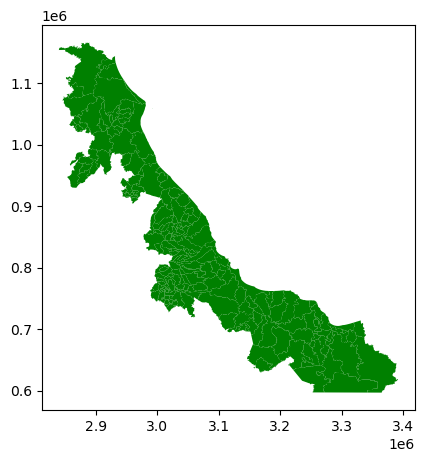

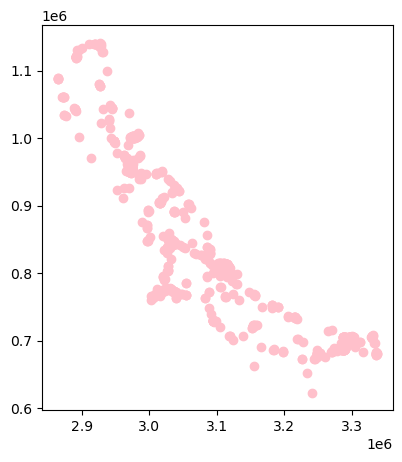

In [20]:
# Graficar los datos
veracruz.plot(color='green', figsize=(5,5))
oxxo_rep.plot(color='pink', figsize=(5,5))
plt.show()

En esta parte primero se crea un mapa base con los datos de Veracruz, despues se busca superponer los datos de Oxxo en el mapa base, donde  en ax=mun indica que los datos de Oxxo se superpondrán en el mapa base creado anteriormente y posteriormente se muestra el mapa final con ambos datos

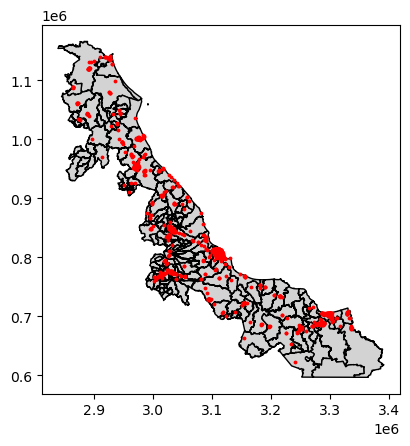

In [21]:
mun = veracruz.plot(color="lightgray", edgecolor="black")

oxxo_rep.plot(ax=mun, color="red", markersize=3)

plt.figsize=(20,20)
plt.show()

### Spatial Join 
En esta parte es donde se realiza una unión espacial entre los dos conjuntos geoespaciales
1. Primero Se utiliza la funcion sjoin() de la librería geopandas que es la que realiza la unión espacial entre ambos conjutos, esta combina los datos basándose en una relación espacial entre los objetos geométricos de ambos Frames
2. Después se menciona los conjuntos de datos geospaciales que se quieren unir.
3. Después se usó el "how= "Left"" que define el tipo de unión que se realizará, que en este caso usa las claves de left_df, y conserva solo la columna de la goemetría left_df, o sea básicamente que se conservan las filas del frame "veracruz", y si un objeto de "veracruz" no contiene coincidencia espacial con ningún objeto de "oxxo_rep", los atributos se mostraran como nulos.
4. Por último, se tiene "predicarte="intersects"" que es por defecto generalmente, los valores válidos se determinan según el índice espacial utilizado. Un objeto de "veracruz" se unirá con un objeto de "oxxo_rep" si sus geometrías se intersectan, o sea, si un punto de Oxxo cae dentro de un polígono de Veracruz"

Abajo se muestra el resultado en un Frame donde estan todas las filas de "veracruz" y los atributos de oxxo_rep se agregan a las filas de "veracruz" donde haya la intersencción espacial

In [23]:
union_veroxxo = gpd.sjoin(veracruz, oxxo_rep, how="left", predicate="contains")

union_veroxxo

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,index_right,id,nom_estab,cod_postal,nomb_asent,cve_ent,localidad,cve_mun,municipio,latitud,longitud
0,30001,30,001,Acajete,"POLYGON ((3018900.835 855634.642, 3018784.609 ...",921.0,9409180.0,OXXO SUC 5078G LA JOYA VER,91325,LA JOYA,30,La Joya,001,Acajete,19.606584,-97.026102
1,30002,30,002,Acatlán,"POLYGON ((3039873.822 866801.278, 3039893.234 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30003,30,003,Acayucan,"POLYGON ((3239677.376 702237.909, 3239824.375 ...",848.0,6407286.0,OXXO SUC 50QXK OLUTA VER,96160,OLUTA,30,Acayucan,003,Acayucan,17.936477,-94.918431
2,30003,30,003,Acayucan,"POLYGON ((3239677.376 702237.909, 3239824.375 ...",940.0,9411728.0,OXXO SUC 507GO LA FLORIDA VER,96049,TAMARINDO,30,Acayucan,003,Acayucan,17.942888,-94.911162
2,30003,30,003,Acayucan,"POLYGON ((3239677.376 702237.909, 3239824.375 ...",541.0,6411185.0,OXXO SUC 50MLH MELCHOR OCAMPO VER,96049,TAMARINDO,30,Acayucan,003,Acayucan,17.942937,-94.911148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,30209,30,209,Tatahuicapan de Juárez,"POLYGON ((3259785.741 743010.144, 3259809.541 ...",1080.0,9402195.0,OXXO SUC 502GJ TATAHUICAPAN VER,95950,TATAHUICAPAN CENTRO,30,Tatahuicapan,209,Tatahuicapan de Juárez,18.245621,-94.760730
209,30210,30,210,Uxpanapa,"POLYGON ((3294448.458 628838.693, 3295361.273 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,30211,30,211,San Rafael,"POLYGON ((3028547.567 930733.755, 3028581.168 ...",994.0,9405356.0,OXXO SUC 501MA EL PIREO VER,93620,EL PIREO,30,San Rafael,211,San Rafael,20.185027,-96.877270
210,30211,30,211,San Rafael,"POLYGON ((3028547.567 930733.755, 3028581.168 ...",797.0,6407466.0,OXXO SUC 50YHK SAN RAFAEL PAZ,93620,SAN RAFAEL,30,San Rafael,211,San Rafael,20.193162,-96.868879


En esta parte se realiza un conteo de tiendas Oxxo por municipio y asegura que los municipios sin tiendas tengan un valor de 0 en lugar de NaN, o sea, se agrupan y se cuentan las tiendas oxxo por municipio y se convierte el resultado de la agrupación en un nuevo DataFrame

In [24]:
conteo_oxxos = union_veroxxo.groupby("CVE_MUN").size().reset_index(name="OXXO_CONT")
# Rellenar NaN con 0 (municipios sin Oxxos)
conteo_oxxos["OXXO_CONT"] = conteo_oxxos["OXXO_CONT"].fillna(0)

Despues unimos el conteo de Oxxos que se realizo en el código anterior y lo unimos con el GeoDataFrame de municipios 

In [25]:
# Unir el conteo de Oxxos con el GeoDataFrame de municipios
veracruz_conteo = veracruz.merge(conteo_oxxos, on="CVE_MUN", how="left")

Por último, se gráfica ese ultimo Frame creado, o sea el de municipios con el conteo de oxxos, y así poder observar que municipios son los que tienen más oxxos y cuales tienen menos

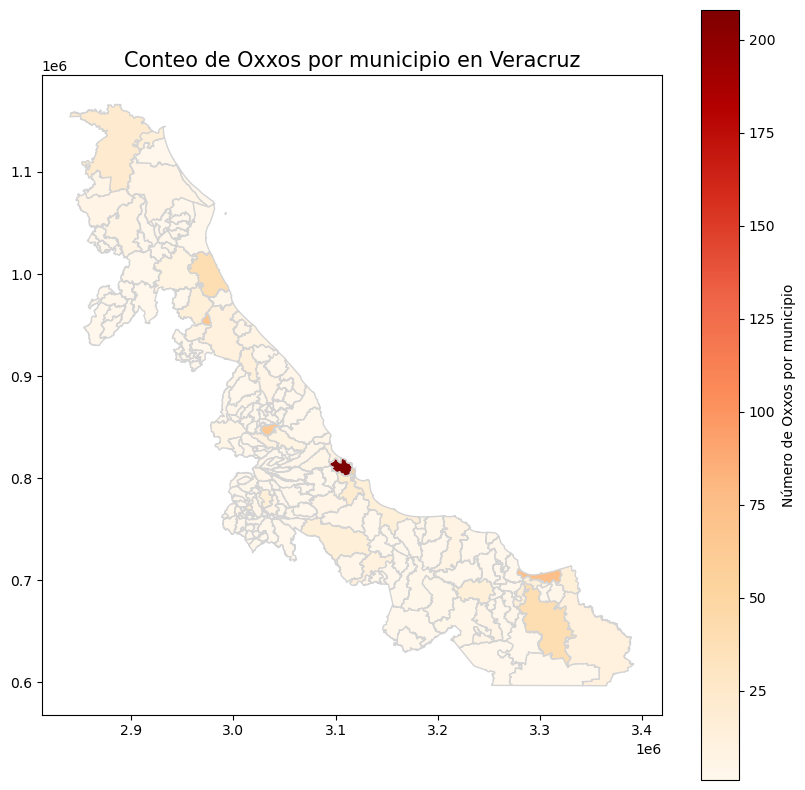

In [27]:
# Graficar el mapa temático
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Mapa de calor según el conteo de Oxxos
veracruz_conteo.plot(column="OXXO_CONT", ax=ax, legend=True, edgecolor="lightgray",
                     legend_kwds={"label": "Número de Oxxos por municipio"},
                     cmap="OrRd",  # Mapa de colores (puedes cambiarlo)
                     missing_kwds={"color": "green", "label": "Sin datos"})

# Añadir título
plt.title("Conteo de Oxxos por municipio en Veracruz", fontsize=15)

# Mostrar el gráfico
plt.show()